In [1]:
"""Preprocess text extracted from scholarly articles into keyphrase candidates.       

The expected input is a list of text extracted from scholarly papers published in Russian from
the dialog conference. The first step is to remove the reference section and any unusually short
paragraphs. Then, parenthesized and bracketed text are removed, as well as any words that happen
to be cut off at a new page boundary.

The text is then tokenized using the preprocessing and tokenization technique developed by 
WebVectores [Kutuzov 2017]. At this point, documents in the corpus are transformed into
lists of tokens corresponding to the paragraphs in the document. Tokens are unigrams of lowercased
lemmas or punctuation marks.

Each document is then broken into sentences, and n-grams are added. This results in each document
being transformed into a list of sentence tokens, which may be unigrams, bigrams, or trigrams.
Finally, the sentence tokens are filtered to remove any unusually short or long tokens and stop
words. The document is flattened, resulting in it being transformed into a list of keyphrase 
candidate tokens.

Typical usage example:

    file_names = get_file_names("../data/raw_txt/2010/ru", ".txt")
    corpus = [get_text(name) for name in file_names]
    corpus = ScholarlyPreprocessor.preprocess(corpus, file_names)
"""

# Reset the kernel (ipython magic command)
%reset -f

<Figure size 432x288 with 0 Axes>

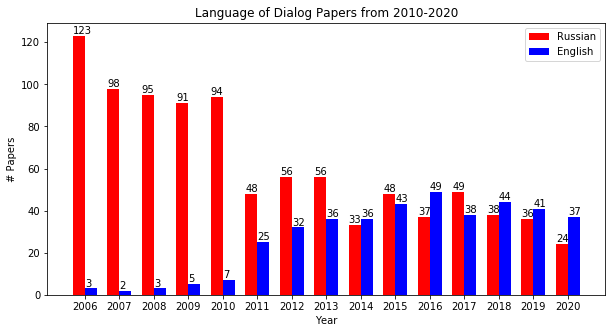

In [2]:
from helpers import get_file_names
from pathlib import Path

import matplotlib.pyplot as plt


# Extract all articles from 2010-2020
year_range = range(2006, 2021)
en_docs = []
ru_docs = []

for year in year_range:
    en_docs.append(len(get_file_names("../data/raw_txt/" +
                                      str(year) + "/en", ".txt")))
    ru_docs.append(len(get_file_names("../data/raw_txt/" +
                                      str(year) + "/ru", ".txt")))

plt.clf()
plt.figure(figsize=(10,5))
plt.title("Language of Dialog Papers from 2010-2020")
plt.xlabel("Year") 
plt.ylabel("# Papers")

width = 0.35
xlocs = [i for i in year_range]
plt.bar(year_range, ru_docs, width, label="Russian", color='red')
for x, y in enumerate(ru_docs):
    plt.text(xlocs[x] - width/2, y + 1, str(y))

plt.bar([year + width for year in year_range], en_docs, width, label="English",
       color='blue')
for x, y in enumerate(en_docs):
    plt.text(xlocs[x] + width/2, y + 1, str(y))

plt.xticks([year + width/2 for year in year_range], year_range)
plt.legend(loc="best")
plt.savefig('../data/LDA/language_distribution.png')
plt.show()

In [16]:
from helpers import get_text
from pathlib import Path
from preprocessing import ScholarlyPreprocessor


# Peek at the transformation of the last paragraph of the first document in the corpus
# as it progresses through the preprocessing steps
file_name = Path("../data/raw_txt/2010/ru/",
                 "эволюция-лингво-семантических-представлений-в-интеллектуальных-системах-на-основе-расширенных-семантических-сетей-p-205.txt")
text = "\n\n".join(get_text(file_name).split("\n\n")[-6:-3])
text = ScholarlyPreprocessor.preprocess_one(text, file_name, verbose=True)

-------------------------------------------------- 
Raw text, before any preprocessing:


7. Заключение
В данной работе представлен опыт создания
и развития лингво-семантических представлений
в интеллектуальных информационных системах,
разработанных на основе аппарата расширенных
семантических сетей (РСС). Аппарат РСС обеспечивает мощные изобразительные возможности для
описания всех уровней естественного языка, включая уровень глубинно-семантических представлений, и межъязыковых соответствий. Конкретные
лингвистические процессоры, которые были соз-
даны на основе этого подхода, прошли определенный эволюционный путь и позволили выработать
проектные решения для основных задач текущего
этапа — извлечения и обработки содержательных
знаний из текстов на естественных языках и сопоставления языковых структур в текстах на различных языках с учетом базовых трансформаций.
Проблема извлечения и обработки знаний открывает перспективы развития интеллектуальных
направлений компьютерной лингвистики, 

2020-07-18 22:37:31,156 : INFO : collecting all words and their counts
2020-07-18 22:37:31,158 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-18 22:37:31,159 : INFO : collected 230 word types from a corpus of 198 words (unigram + bigrams) and 8 sentences
2020-07-18 22:37:31,160 : INFO : using 230 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-18 22:37:31,161 : INFO : collecting all words and their counts
2020-07-18 22:37:31,162 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-18 22:37:31,165 : INFO : collected 230 word types from a corpus of 198 words (unigram + bigrams) and 8 sentences
2020-07-18 22:37:31,166 : INFO : using 230 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>



After tokenization:


['x', '.', 'заключение', 'в', 'данный', 'работа', 'представлять', 'опыт', 'создание', 'и', 'развитие', 'лингво-семантический', 'представление', 'в', 'интеллектуальный', 'информационный', 'система', ',', 'разрабатывать', 'на', 'основа', 'аппарат', 'расширить', 'семантический', 'сеть', '.', 'аппарат::рсс', 'обеспечивать', 'мощный', 'изобразительный', 'возможность', 'для', 'описание', 'весь', 'уровень', 'естественный', 'язык', ',', 'включая', 'уровень', 'глубинный', '-', 'семантический', 'представление', ',', 'и', 'межъязыковый', 'соответствие', '.', 'конкретный', 'лингвистический', 'процессор', ',', 'который', 'быть', 'давать', 'на', 'основа', 'этот', 'подход', ',', 'проходить', 'определенный', 'эволюционный', 'путь', 'и', 'позволять', 'вырабатывать', 'проектный', 'решение', 'для', 'основной', 'задача', 'текущий', 'этап', '—', 'извлечение', 'и', 'обработка', 'содержательный', 'знание', 'из', 'текст', 'на', 'естественный', 'язык', 'и', 'сопоставление', 'языковой', '

In [ ]:
from helpers import get_file_names, get_text
from pathlib import Path
from preprocessing import ScholarlyPreprocessor

import os
import pickle


# Preprocess the entire corpus
year_range = range(2006, 2021)
target = str(Path("../data/preprocessed").resolve())
if not os.path.exists(target):
    os.makedirs(target)

for year in year_range:
    output_file = Path(target, str(year) + ".pickle")
    if not os.path.isfile(output_file):
        print("Preprocessing text from", year, "to", output_file)

        file_names = get_file_names("../data/raw_txt/" + str(year)
                                    + "/ru", ".txt")
        corpus = [get_text(name) for name in file_names]
        corpus = ScholarlyPreprocessor.preprocess(corpus, file_names)

        with open(output_file, "wb") as file:
            pickle.dump(corpus, file, pickle.HIGHEST_PROTOCOL)
        print("Finished preprocessing text from", year, 
              "to", output_file)
    else:
        print(output_file, "already preprocessed")